In [ ]:
import torch

In [6]:
torch.cuda.is_available()

True

In [2]:
import torch
import torchvision

from torchvision import transforms

# Define the data transformations (including normalization)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
# Load Fashion MNIST dataset
fmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fmnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Load CIFAR-10 dataset
cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar10_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Data analysis
print("Fashion MNIST dataset analysis:")
print("Number of training samples:", len(fmnist_trainset))
print("Number of test samples:", len(fmnist_testset))
# print("Image shape:", fmnist_trainset[0][0].shape)
print("Number of classes:", len(fmnist_trainset.classes))
print("Classes:", fmnist_trainset.classes)

print("\nCIFAR-10 dataset analysis:")
print("Number of training samples:", len(cifar10_trainset))
print("Number of test samples:", len(cifar10_testset))
print("Image shape:", cifar10_trainset[0][0].shape)
print("Number of classes:", len(cifar10_trainset.classes))
print("Classes:", cifar10_trainset.classes)

Fashion MNIST dataset analysis:
Number of training samples: 60000
Number of test samples: 10000
Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

CIFAR-10 dataset analysis:
Number of training samples: 50000
Number of test samples: 10000
Image shape: torch.Size([3, 32, 32])
Number of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


CIFAR-10 Image Statistics:
Mean Pixel Values (R, G, B): 0.4733649
Standard Deviation (R, G, B): 0.25156906


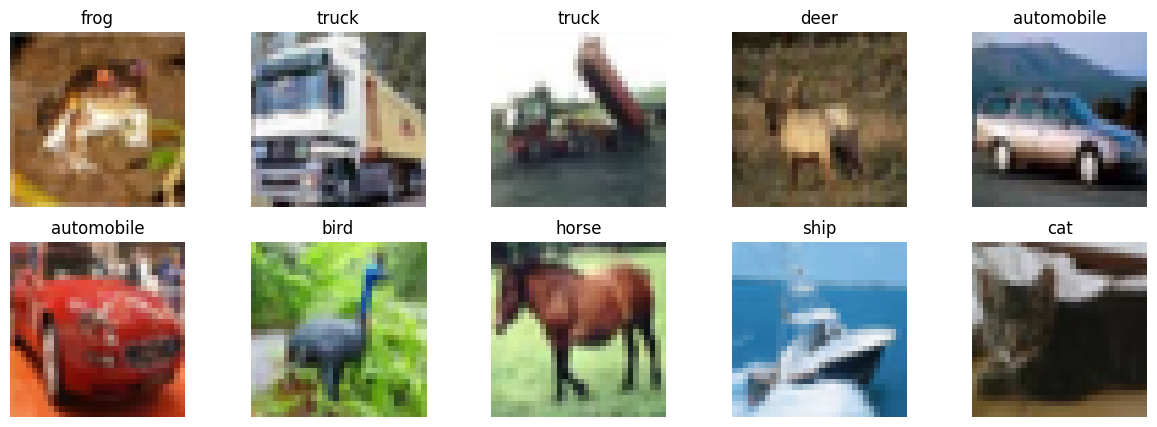

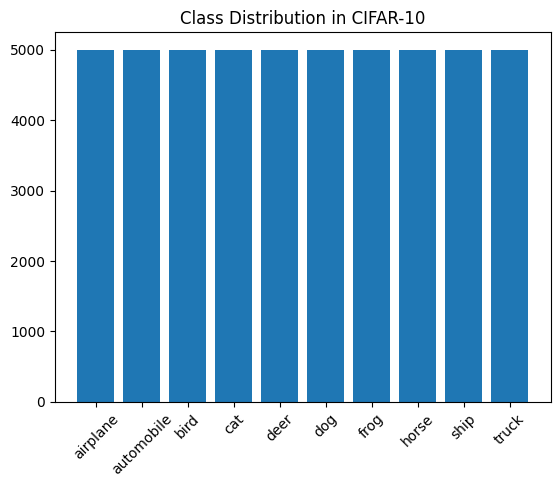

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data visualization
num_samples_to_visualize = 10

# Visualize a few sample images
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_visualize):
    plt.subplot(2, 5, i + 1)
    image, label = cifar10_trainset[i]
    # Convert from tensor to numpy array and transpose the channels to HWC format
    image = image.numpy().transpose((1, 2, 0))
    plt.imshow(image)
    plt.title(cifar10_trainset.classes[label])
    plt.axis('off')

# Class distribution analysis
class_distribution = [0] * len(cifar10_trainset.classes)

for _, label in cifar10_trainset:
    class_distribution[label] += 1

plt.figure()
plt.bar(cifar10_trainset.classes, class_distribution)
plt.xticks(rotation=45)
plt.title("Class Distribution in CIFAR-10")

# Image statistics analysis
images = [img.numpy() for img, _ in cifar10_trainset]
images = np.concatenate(images, axis=0)
mean_pixel = np.mean(images, axis=(0, 1, 2))
stddev_pixel = np.std(images, axis=(0, 1, 2))

print("CIFAR-10 Image Statistics:")
print("Mean Pixel Values (R, G, B):", mean_pixel)
print("Standard Deviation (R, G, B):", stddev_pixel)

plt.show()


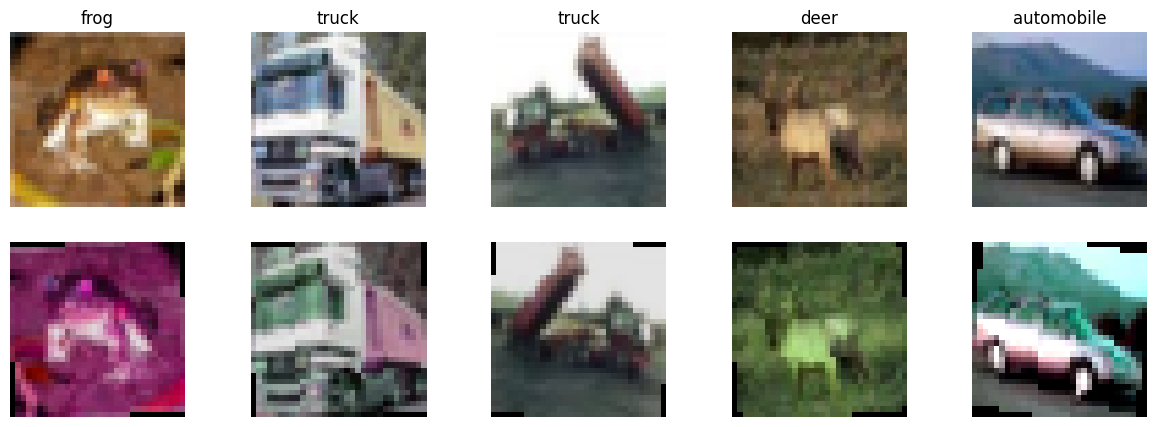

In [12]:
# Define data augmentation and preprocessing transformations
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
])

# Visualize augmented images
num_samples_to_visualize = 5

plt.figure(figsize=(15, 5))
for i in range(num_samples_to_visualize):
    plt.subplot(2, num_samples_to_visualize, i + 1)
    image, label = cifar10_trainset[i]
    plt.imshow(image.permute(1, 2, 0))
    plt.title(cifar10_trainset.classes[label])
    plt.axis('off')

    # Apply the data augmentation
    augmented_image = data_transforms(image)
    plt.subplot(2, num_samples_to_visualize, i + num_samples_to_visualize + 1)
    plt.imshow(augmented_image.permute(1, 2, 0))
    plt.axis('off')

plt.show()

## Channel analysis